In [21]:
from itertools import cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

Frequency (Hz) (Period)

Intensity (Amplitude) (db / power)

Sample Rate (Quality / Detail about the audio file)

Reading in Audio Files: mp3, wav, m4a, flac, ogg

In [5]:
audio_files = glob("./Audio_Song_Actors_01-24/*/*.wav")

In [6]:
# Play audio file
ipd.Audio(audio_files[0])

In [7]:
y, sr = librosa.load(audio_files[0])
# y is the raw data, and sr is the sample rate (int)

In [8]:
y

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -7.2350392e-10,  9.0775260e-10, -1.0168578e-09], dtype=float32)

In [10]:
sr
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (103003,)
sr: 22050


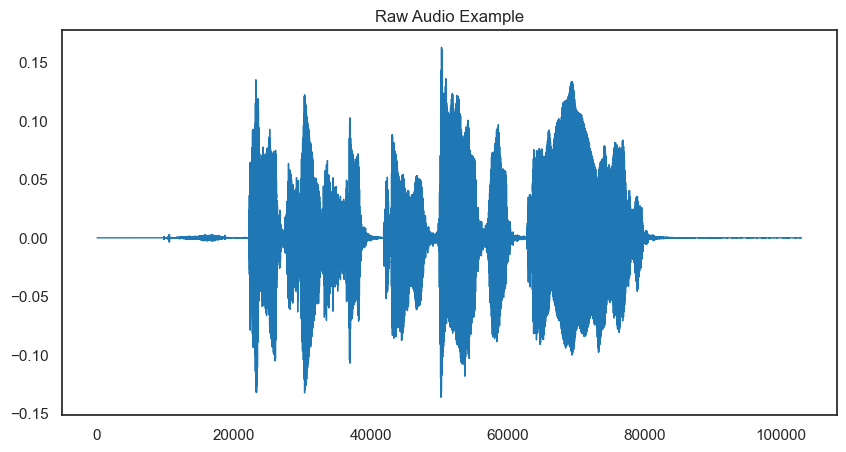

In [25]:
pd.Series(y).plot(
    figsize=(10,5),
    lw=1,
    title="Raw Audio Example",
    color=color_pal[0]
)
plt.show()

In [27]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

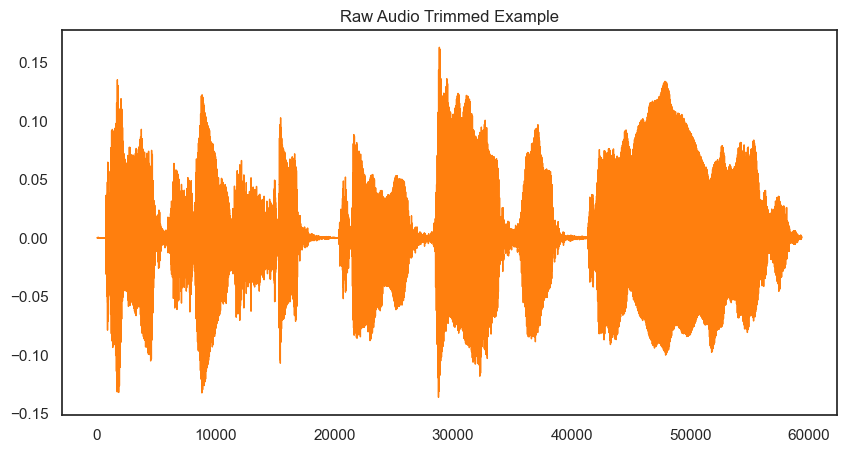

In [28]:
pd.Series(y_trimmed).plot(
    figsize=(10,5),
    lw=1,
    title="Raw Audio Trimmed Example",
    color=color_pal[1]
)
plt.show()

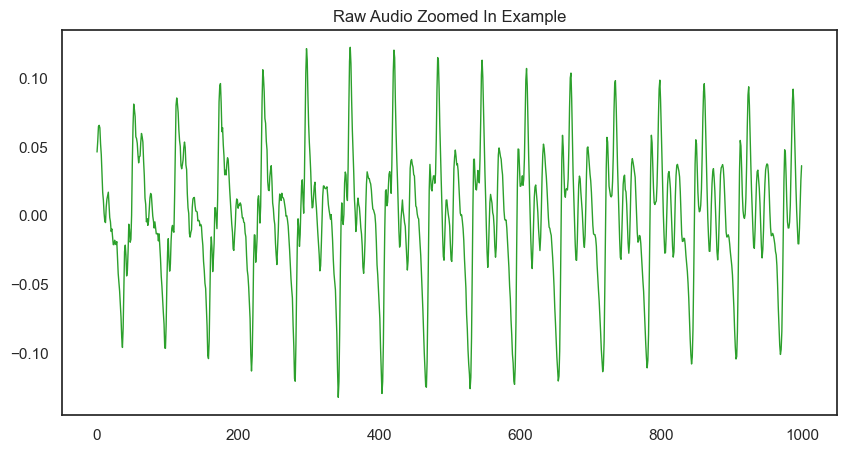

In [ ]:
# zooming in helps visualize the audio
pd.Series(y[30000:31000]).plot(
    figsize=(10,5),
    lw=1,
    title="Raw Audio Zoomed In Example",
    color=color_pal[2]
)
plt.show()

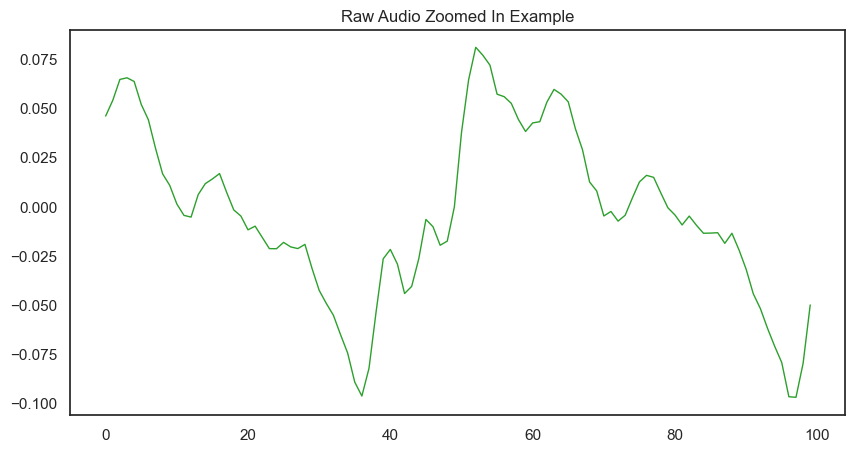

In [31]:
pd.Series(y[30000:30100]).plot(
    figsize=(10,5),
    lw=1,
    title="Raw Audio Zoomed In Example",
    color=color_pal[2]
)
plt.show()

Spectrogram

In [33]:
D = librosa.stft(y)
# amplitude to decibel
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 202)

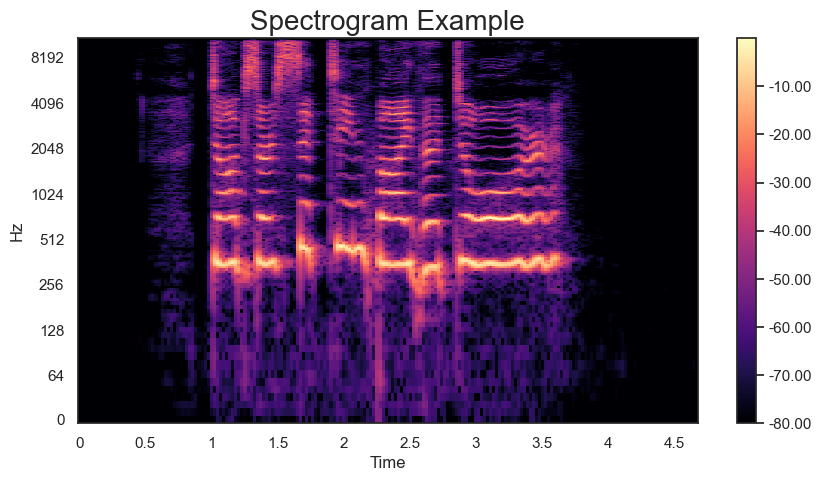

In [36]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax
                            )

ax.set_title("Spectrogram Example", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()